LOAD IN DATASET

import pandas as pd

# Load CSV file
df = pd.read_csv("data_assignment2.csv")

# Display first few rows
df.head()


Plots per Variable

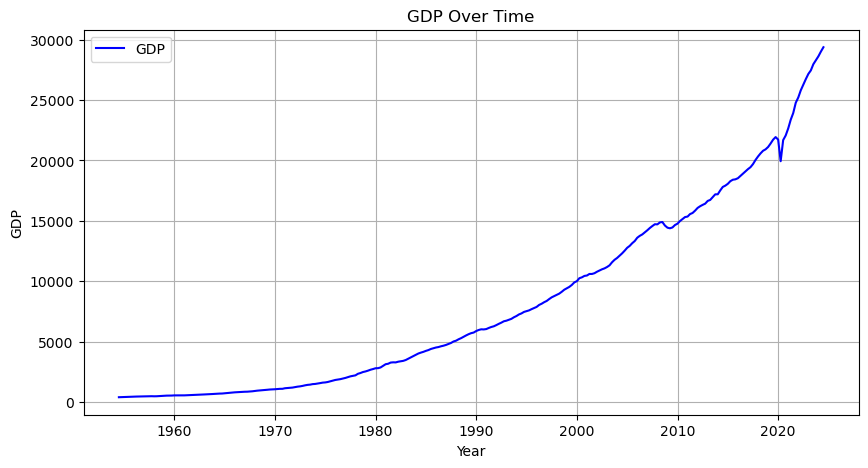

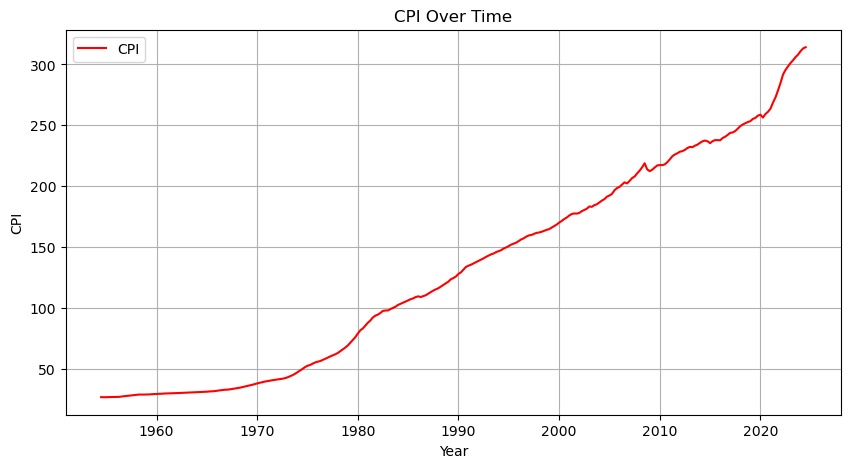

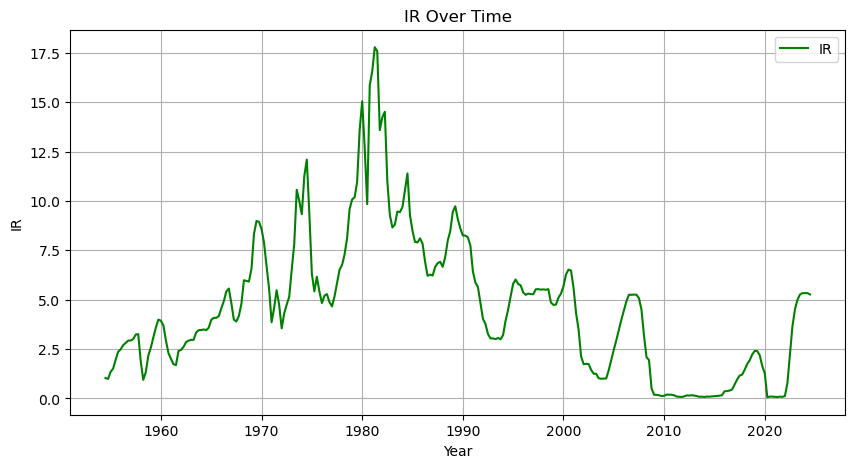

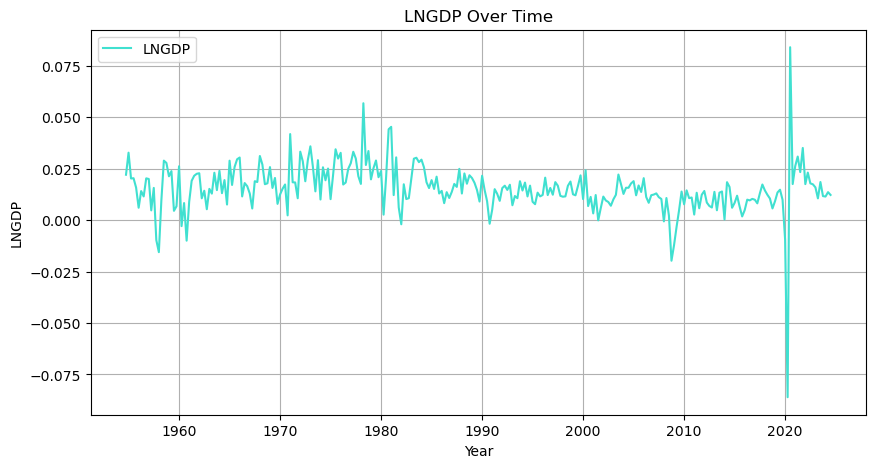

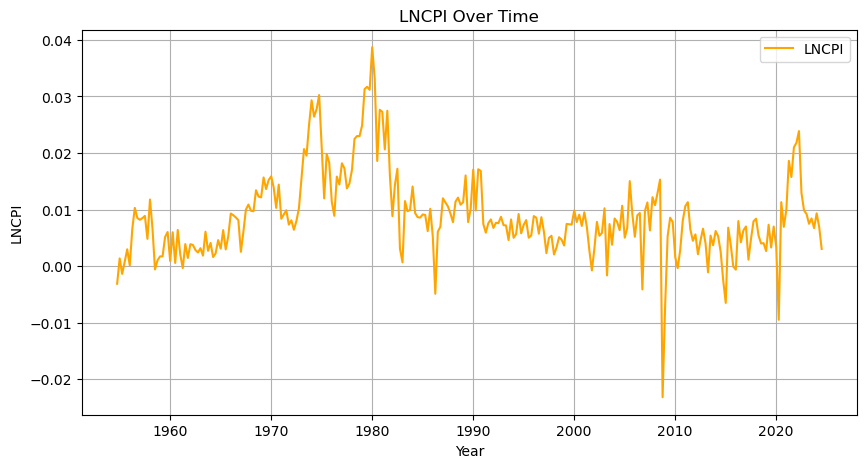

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv("data_assignment2.csv")  # Load the dataset

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Set 'date' as index for time series plotting
df.set_index("date", inplace=True)

plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df.index, df["gdp"], label="GDP", color="blue")  
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Over Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df.index, df["cpi"], label="CPI", color="red")  
plt.xlabel("Year")
plt.ylabel("CPI")
plt.title("CPI Over Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df.index, df["ir"], label="IR", color="green")  
plt.xlabel("Year")
plt.ylabel("IR")
plt.title("IR Over Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df.index, df["DLgdp"], label="LNGDP", color="turquoise")  
plt.xlabel("Year")
plt.ylabel("LNGDP")
plt.title("LNGDP Over Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df.index, df["DLcpi"], label="LNCPI", color="orange")  
plt.xlabel("Year")
plt.ylabel("LNCPI")
plt.title("LNCPI Over Time")
plt.legend()
plt.grid(True)
plt.show()

AR models

In [16]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("data_assignment2.csv", parse_dates=["date"])

# Use only relevant variables
df = df[["date", "gdp", "cpi", "ir"]]

# Set date as index
df.set_index("date", inplace=True)

# Define maximum lag order
max_lag = 5

# Define variables to estimate AR(p) models for
variables = ["gdp", "cpi", "ir"]

# Create a dictionary to store results for each variable
results = {var: {} for var in variables}

# Loop over each variable
for var in variables:
    for p in range(max_lag + 1):
        # Construct lagged variables inside a DataFrame to maintain index alignment
        df_lagged = df.copy()
        df_lagged["constant"] = 1  # Add a column of ones for the intercept

        if p > 0:
            for lag in range(1, p + 1):
                df_lagged[f"{var}_lag{lag}"] = df_lagged[var].shift(lag)  # Create lagged variables

        # Ensure all columns have the same length by slicing appropriately
        X = df_lagged[["constant"] + [f"{var}_lag{lag}" for lag in range(1, p + 1)]].iloc[p:].to_numpy()
        Y = df_lagged[var].iloc[p:].to_numpy().reshape(-1, 1)

        # OLS Estimation: β = (X'X)^(-1) X'Y
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

        # Compute residuals: ε = Y - Xβ
        residuals = Y - X @ beta_hat

        # Estimate standard errors: Var(β) = σ² (X'X)^(-1)
        sigma_sq = (residuals.T @ residuals) / (len(Y) - p - 1)  # Unbiased variance estimator
        var_beta = sigma_sq * np.linalg.inv(X.T @ X)
        std_err = np.sqrt(np.diag(var_beta))  # Standard errors

        # Store results
        results[var][p] = {"Coefficients": beta_hat.flatten(), "Std_Errors": std_err}

# Convert results to DataFrames for display
result_dfs = {}
for var in variables:
    result_dfs[var] = pd.DataFrame({
        "Lag Order": list(results[var].keys()),
        "Constant": [results[var][p]["Coefficients"][0] for p in results[var].keys()],
        "SE(Constant)": [results[var][p]["Std_Errors"][0] for p in results[var].keys()],
        **{f"Phi_{j}": [results[var][p]["Coefficients"][j] if j < len(results[var][p]["Coefficients"]) else np.nan for p in results[var].keys()] for j in range(1, max_lag + 1)},
        **{f"SE(Phi_{j})": [results[var][p]["Std_Errors"][j] if j < len(results[var][p]["Std_Errors"]) else np.nan for p in results[var].keys()] for j in range(1, max_lag + 1)}
    })

from IPython.display import display

# Display each result as a table
for var in variables:
    print(f"\nAR(p) Estimation for {var.upper()}")
    display(result_dfs[var])  # Use print(result_dfs[var].to_string()) for console output




AR(p) Estimation for GDP


,Lag Order,Constant,SE(Constant),Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,SE(Phi_1),SE(Phi_2),SE(Phi_3),SE(Phi_4),SE(Phi_5)
0,0,8133.716520,460.115653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8.590213,15.316582,1.011780,NaN,NaN,NaN,NaN,0.001382,NaN,NaN,NaN,NaN
2,2,9.025601,15.363254,0.919053,0.093866,NaN,NaN,NaN,0.059934,0.060655,NaN,NaN,NaN
3,3,8.682618,15.447438,0.924953,0.151467,-0.064349,NaN,NaN,0.060290,0.081697,0.061021,NaN,NaN
4,4,8.356590,15.516944,0.920044,0.163127,0.006032,-0.078104,NaN,0.060454,0.082262,0.082272,0.061188,NaN
5,5,8.363436,15.632705,0.919381,0.163195,0.007424,-0.070345,-0.008658,0.060856,0.082564,0.083167,0.082574,0.061597



AR(p) Estimation for CPI


,Lag Order,Constant,SE(Constant),Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,SE(Phi_1),SE(Phi_2),SE(Phi_3),SE(Phi_4),SE(Phi_5)
0,0,131.137040,5.067045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.292133,0.109818,1.005624,NaN,NaN,NaN,NaN,0.000707,NaN,NaN,NaN,NaN
2,2,0.155964,0.094466,1.541256,-0.538802,NaN,NaN,NaN,0.050951,0.051247,NaN,NaN,NaN
3,3,0.146151,0.094997,1.485849,-0.380329,-0.103360,NaN,NaN,0.060295,0.105964,0.060615,NaN,NaN
4,4,0.131603,0.094596,1.467307,-0.443948,0.150405,-0.172036,NaN,0.059973,0.107123,0.107255,0.06038,NaN
5,5,0.137354,0.095374,1.476821,-0.452010,0.175298,-0.256112,0.057849,0.060974,0.107696,0.110721,0.10798,0.061404



AR(p) Estimation for IR


,Lag Order,Constant,SE(Constant),Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,SE(Phi_1),SE(Phi_2),SE(Phi_3),SE(Phi_4),SE(Phi_5)
0,0,4.609205,0.212153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.152965,0.082184,0.970078,NaN,NaN,NaN,NaN,0.014122,NaN,NaN,NaN,NaN
2,2,0.184617,0.079620,1.245102,-0.282690,NaN,NaN,NaN,0.057725,0.057625,NaN,NaN,NaN
3,3,0.160032,0.079779,1.288018,-0.470700,0.150606,NaN,NaN,0.059713,0.093845,0.059605,NaN,NaN
4,4,0.182896,0.079357,1.315383,-0.556006,0.383483,-0.180323,NaN,0.059635,0.096822,0.096797,0.059520,NaN
5,5,0.182306,0.080418,1.312909,-0.551039,0.376265,-0.161235,-0.014534,0.060832,0.099912,0.102857,0.099876,0.060713


PRE-COVID AR models

In [17]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("data_assignment2.csv", parse_dates=["date"])

# Use only relevant variables
df = df[["date", "gdp", "cpi", "ir"]]

# Set date as index
df.set_index("date", inplace=True)

# Create a copy of the dataset excluding the last 20 observations
df_precovid = df.iloc[:-20].copy()

# Define maximum lag order
max_lag = 5

# Define variables to estimate AR(p) models for
variables = ["gdp", "cpi", "ir"]

# Create a dictionary to store results for each variable
results_precovid = {var: {} for var in variables}

# Loop over each variable
for var in variables:
    for p in range(max_lag + 1):
        # Construct lagged variables inside a DataFrame to maintain index alignment
        df_lagged = df_precovid.copy()
        df_lagged["constant"] = 1  # Add a column of ones for the intercept

        if p > 0:
            for lag in range(1, p + 1):
                df_lagged[f"{var}_lag{lag}"] = df_lagged[var].shift(lag)  # Create lagged variables

        # Ensure all columns have the same length by slicing appropriately
        X = df_lagged[["constant"] + [f"{var}_lag{lag}" for lag in range(1, p + 1)]].iloc[p:].to_numpy()
        Y = df_lagged[var].iloc[p:].to_numpy().reshape(-1, 1)

        # OLS Estimation: β = (X'X)^(-1) X'Y
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

        # Compute residuals: ε = Y - Xβ
        residuals = Y - X @ beta_hat

        # Estimate standard errors: Var(β) = σ² (X'X)^(-1)
        sigma_sq = (residuals.T @ residuals) / (len(Y) - p - 1)  # Unbiased variance estimator
        var_beta = sigma_sq * np.linalg.inv(X.T @ X)
        std_err = np.sqrt(np.diag(var_beta))  # Standard errors

        # Store results
        results_precovid[var][p] = {"Coefficients": beta_hat.flatten(), "Std_Errors": std_err}

# Convert results to DataFrames for display
result_dfs_precovid = {}
for var in variables:
    result_dfs_precovid[var] = pd.DataFrame({
        "Lag Order": list(results_precovid[var].keys()),
        "Constant": [results_precovid[var][p]["Coefficients"][0] for p in results_precovid[var].keys()],
        "SE(Constant)": [results_precovid[var][p]["Std_Errors"][0] for p in results_precovid[var].keys()],
        **{f"Phi_{j}": [results_precovid[var][p]["Coefficients"][j] if j < len(results_precovid[var][p]["Coefficients"]) else np.nan for p in results_precovid[var].keys()] for j in range(1, max_lag + 1)},
        **{f"SE(Phi_{j})": [results_precovid[var][p]["Std_Errors"][j] if j < len(results_precovid[var][p]["Std_Errors"]) else np.nan for p in results_precovid[var].keys()] for j in range(1, max_lag + 1)}
    })

from IPython.display import display

# Display each result as a table
for var in variables:
    print(f"\nAR(p) Estimation for {var.upper()} (Pre-COVID Data)")
    display(result_dfs_precovid[var])  # Use print(result_dfs_precovid[var].to_string()) for console output



AR(p) Estimation for GDP (Pre-COVID Data)


,Lag Order,Constant,SE(Constant),Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,SE(Phi_1),SE(Phi_2),SE(Phi_3),SE(Phi_4),SE(Phi_5)
0,0,6825.953709,388.219723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21.362718,5.426556,1.008962,NaN,NaN,NaN,NaN,0.000591,NaN,NaN,NaN,NaN
2,2,11.857262,5.037378,1.458987,-0.454038,NaN,NaN,NaN,0.056254,0.056752,NaN,NaN,NaN
3,3,10.528079,5.103254,1.409203,-0.291050,-0.113759,NaN,NaN,0.062579,0.106929,0.063341,NaN,NaN
4,4,9.789063,5.169159,1.399711,-0.313350,-0.000966,-0.081358,NaN,0.063059,0.108415,0.108856,0.063925,NaN
5,5,10.141748,5.238102,1.402532,-0.313185,0.008183,-0.126311,0.032949,0.063544,0.108789,0.110735,0.109412,0.064809



AR(p) Estimation for CPI (Pre-COVID Data)


,Lag Order,Constant,SE(Constant),Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,SE(Phi_1),SE(Phi_2),SE(Phi_3),SE(Phi_4),SE(Phi_5)
0,0,119.328825,4.701792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.480450,0.092209,1.003378,NaN,NaN,NaN,NaN,0.000655,NaN,NaN,NaN,NaN
2,2,0.292959,0.088269,1.423717,-0.421867,NaN,NaN,NaN,0.056671,0.056868,NaN,NaN,NaN
3,3,0.294443,0.090622,1.419208,-0.409281,-0.008107,NaN,NaN,0.062846,0.106168,0.063031,NaN,NaN
4,4,0.253251,0.091306,1.417810,-0.487339,0.255754,-0.184814,NaN,0.062003,0.107943,0.108268,0.062359,NaN
5,5,0.250497,0.093080,1.411319,-0.478701,0.239485,-0.139078,-0.031681,0.063319,0.109528,0.113122,0.109953,0.063646



AR(p) Estimation for IR (Pre-COVID Data)


,Lag Order,Constant,SE(Constant),Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,SE(Phi_1),SE(Phi_2),SE(Phi_3),SE(Phi_4),SE(Phi_5)
0,0,4.785313,0.221368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.148527,0.088848,0.969957,NaN,NaN,NaN,NaN,0.014858,NaN,NaN,NaN,NaN
2,2,0.183973,0.086694,1.227002,-0.264576,NaN,NaN,NaN,0.060276,0.060199,NaN,NaN,NaN
3,3,0.154014,0.086815,1.270906,-0.467027,0.164719,NaN,NaN,0.061894,0.096579,0.061811,NaN,NaN
4,4,0.179607,0.086548,1.300183,-0.550051,0.390257,-0.177169,NaN,0.062006,0.099740,0.099721,0.061927,NaN
5,5,0.178784,0.087859,1.297767,-0.545047,0.383239,-0.158463,-0.014392,0.063234,0.103101,0.105959,0.103076,0.063171
